# LCMS Data Walkthrough

In [1]:
## Import required packages
import shutil
import numpy as np
from pathlib import Path

from corems.mass_spectra.input.rawFileReader import ImportMassSpectraThermoMSFileReader
from corems.mass_spectra.output.export import LCMSExport
from corems.molecular_id.search.molecularFormulaSearch import SearchMolecularFormulasLC
from corems.encapsulation.factory.parameters import LCMSParameters

/Users/cies677/miniconda3/envs/corems/lib/python3.10/site-packages/numpy/core/getlimits.py:511: UserWarning: Signature b'\x00\xd0\xcc\xcc\xcc\xcc\xcc\xcc\xfb\xbfb\x1d\xab\x7f\x00\x00' for <class 'numpy.float128'> does not match any known type: falling back to type probe function.
This warnings indicates broken support for the dtype!
  machar = _get_machar(dtype)


## Read in and parse data

In [2]:
## Remove results if they already exist (if this program has been run before)
shutil.rmtree(
    'Blanch_Nat_Lip_C_12_AB_M_17_NEG_25Jan18_Brandi-WCSH5801.corems',
    ignore_errors = True,
)

## Point to file location
#file_raw = (
#    Path.cwd()
#    / "tests/tests_data/lcms/"
#    / "Blanch_Nat_Lip_C_12_AB_M_17_NEG_25Jan18_Brandi-WCSH5801.raw"
#)
file_raw = '/Users/cies677/sandbox/corems/tests/tests_data/lcms/Blanch_Nat_Lip_C_12_AB_M_17_NEG_25Jan18_Brandi-WCSH5801.raw'

## Declare/define class object that will parse the raw data
# see corems/corems/mass_spectra/input/rawFileReader.py for more information
# features from this parser can be called from instantiated object
parser = ImportMassSpectraThermoMSFileReader(file_raw)

## Instatiate LC-MS data object as LCMSBase object
# see corems/corems/mass_spectra/factory/lc_class.py for details on LCMSBase object
# pull in MS1 spectra into dataframe (without storing as MassSpectrum objects to save memory)
myLCMSobj = parser.get_lcms_obj(spectra = 'ms1')

## Display unprocessed MS1 spectra
# values are read in as a dictionary with key '1' which indicates the MS level
# MS2 data has not been added yet
myLCMSobj._ms_unprocessed[1]

,scan,mz,intensity
0,1.0,200.944397,78.978500
1,1.0,200.944946,180.334900
2,1.0,200.945480,243.672440
3,1.0,200.946014,229.599655
4,1.0,200.946548,146.636734
...,...,...,...
7696962,6832.0,1993.325928,348.023376
7696963,6832.0,1993.342651,499.614685
7696964,6832.0,1993.359497,563.129639
7696965,6832.0,1993.376343,495.025146


### Available data

In [3]:
## A dataframe holding the scans has been generated
myLCMSobj.scan_df

,scan,scan_time,tic,ms_level,scan_text,scan_window_lower,scan_window_upper,polarity,precursor_mz,ms_format
1,1,0.007275,837892.375000,1,FTMS - p ESI Full ms [200.00-2000.00],200.00,2000.00,negative,NaN,profile
2,2,0.018838,98227.609375,2,FTMS - c ESI d Full ms2 283.26@hcd30.00 [90.00...,90.00,295.00,negative,283.26,centroid
3,3,0.044628,7.900221,2,ITMS - c ESI d Full ms2 283.26@cid35.00 [50.00...,50.00,295.00,negative,283.26,centroid
4,4,0.047777,49953.238281,2,FTMS - c ESI d Full ms2 455.35@hcd30.00 [90.00...,90.00,470.00,negative,455.35,centroid
5,5,0.066162,117.217705,2,ITMS - c ESI d Full ms2 455.35@cid35.00 [80.00...,80.00,470.00,negative,455.35,centroid
...,...,...,...,...,...,...,...,...,...,...
6836,6836,34.001983,1584.376831,2,ITMS - c ESI d Full ms2 391.29@cid35.00 [65.00...,65.00,405.00,negative,391.29,centroid
6837,6837,34.004567,450421.312500,2,FTMS - c ESI d Full ms2 217.00@hcd30.00 [90.00...,90.00,230.00,negative,217.00,centroid
6838,6838,34.011455,0.000000,2,ITMS - c ESI d Full ms2 217.00@cid35.00 [50.00...,50.00,230.00,negative,217.00,centroid
6839,6839,34.013985,542244.875000,2,FTMS - c ESI d Full ms2 255.23@hcd30.00 [90.00...,90.00,270.00,negative,255.23,centroid


In [4]:
## In dataframe form, easy to call specific series

# TICs
myLCMSobj.scan_df.tic

1       837892.375000
2        98227.609375
3            7.900221
4        49953.238281
5          117.217705
            ...      
6836      1584.376831
6837    450421.312500
6838         0.000000
6839    542244.875000
6840        13.090403
Name: tic, Length: 6840, dtype: float64

In [5]:
# Retention times
myLCMSobj.scan_df.scan_time

1        0.007275
2        0.018838
3        0.044628
4        0.047777
5        0.066162
          ...    
6836    34.001983
6837    34.004567
6838    34.011455
6839    34.013985
6840    34.021578
Name: scan_time, Length: 6840, dtype: float64

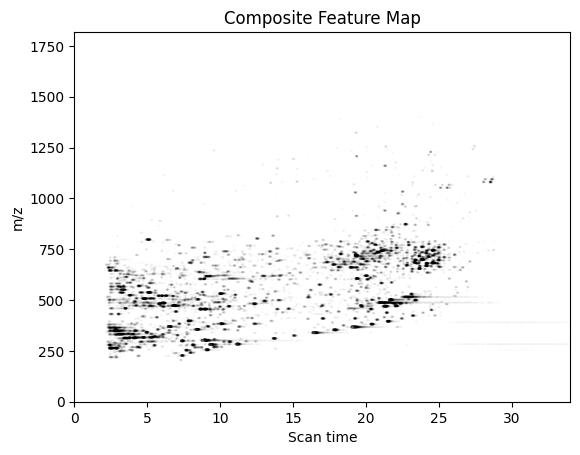

In [6]:
## A visualization of the raw data can be generated
# plots the scan time as the independent variable and the m/z value as the dependent value
# darkness of each point indicates the intensity detected at the m/z value
myLCMSobj.plot_composite_mz_features(mf_plot = False, ms2_plot = False)

## Set Parameters

In [7]:
## Setting parameters appropriate for experimentation
## For more information: corems/corems/encapsulation/factory/parameters.py

## Incorporate parameters into the LCMSBase object
# see corems/corems/encapsulation/factory/parameters.py
myLCMSobj.parameters = LCMSParameters(use_defaults = True) # Set parameters to the defaults for reproducible testing

## Set parameters on the LCMS object that are reasonable for testing (speed things up)
# persistent homology parameters, see corems/corems/encapsulation/factory/processSetting.py
# adjusted for demonstration purposes to improve runtime
# based on observation, smoothing does not improve peak picking for these type of data
myLCMSobj.parameters.lc_ms.ph_inten_min_rel = 0.05 # default is 0.001
myLCMSobj.parameters.lc_ms.ph_persis_min_rel = 0.05 # default is 0.001
myLCMSobj.parameters.lc_ms.ph_smooth_it = 0 # default is 1

## MSParameters for ms1 mass spectra
# see corems/corems/encapsulation/factory/parameters.py
## set parameters for how to process an individual mass spectrum object
ms1_params = myLCMSobj.parameters.mass_spectrum['ms1']
ms1_params.mass_spectrum.noise_threshold_method = "relative_abundance" 
ms1_params.mass_spectrum.noise_threshold_min_relative_abundance = 0.1 
ms1_params.mass_spectrum.noise_min_mz, ms1_params.mass_spectrum.min_picking_mz = 0, 0
ms1_params.mass_spectrum.noise_max_mz, ms1_params.mass_spectrum.max_picking_mz = np.inf, np.inf
ms1_params.ms_peak.legacy_resolving_power = False

## set parameters for how to apply molecular formula searches to MS objects
ms1_params.molecular_search.url_database = "" ## this will default to using a local sqlite database
ms1_params.molecular_search.usedAtoms = {
    'C': (10, 30), # default (1, 90)
    'H': (18, 200), # default (4, 200)
    'O': (1, 23), # default (0, 12)
    'N': (0, 3), # default (0, 0)
    'P': (0, 1), # default (0, 0)
    'S': (0, 1), # default (0, 0)
    # default also contains Cl
}

## settings for MS2 data (HCD scans), same as ms1_params
# see corems/corems/encapsulation/factory/processSetting.py
ms2_params_hcd = ms1_params.copy()
myLCMSobj.parameters.mass_spectrum['ms2'] = ms2_params_hcd

## settings for ms2 data (CID scans), one change from ms1_params
# lower noise threshold for CID scans
ms2_params_cid = ms2_params_hcd.copy()
ms2_params_cid.mass_spectrum.noise_threshold_min_relative_abundance = 0.01 
myLCMSobj.parameters.mass_spectrum['ms2_cid'] = ms2_params_cid

## Identify MS1 MZ features

In [8]:
## Identify the MZ features from the raw data using the persistent homology method
# see corems/corems/mass_spectra/calc/lc_calc.py
myLCMSobj.find_mass_features()

## The previous function generated a summarizing dataframe to quickly reference the identified attributes
# Some columns are initiated but require additional function calls to be completed
myLCMSobj.mass_features_to_df()

Found 81 initial mass features
50 mass features remaining


,scan_time,mz,apex_scan,start_scan,final_scan,intensity,persistence,area,dispersity_index,monoisotopic_mf_id,isotopologue_type,mass_spectrum_deconvoluted_parent
mf_id,,,,,,,,,,,,
0,8.895637,301.216614,1882.0,None,None,66775328.0,63432449.0,None,None,None,None,None
1,19.152648,367.357483,4069.0,None,None,48137056.0,44794177.0,None,None,None,None,None
3,16.438137,339.326111,3484.0,None,None,35888348.0,32545469.0,None,None,None,None,None
4,8.378137,355.321167,1756.0,None,None,25525068.0,22182189.0,None,None,None,None,None
5,6.515803,369.300629,1297.0,None,None,25392018.0,22049139.0,None,None,None,None,None
6,9.397805,281.248322,2008.0,None,None,24492228.0,21149349.0,None,None,None,None,None
7,11.155970,283.264038,2422.0,None,None,23294938.0,19952059.0,None,None,None,None,None
8,21.274803,469.404755,4600.0,None,None,22771026.0,19428147.0,None,None,None,None,None
10,9.071805,255.233109,1927.0,None,None,20920262.0,17577383.0,None,None,None,None,None


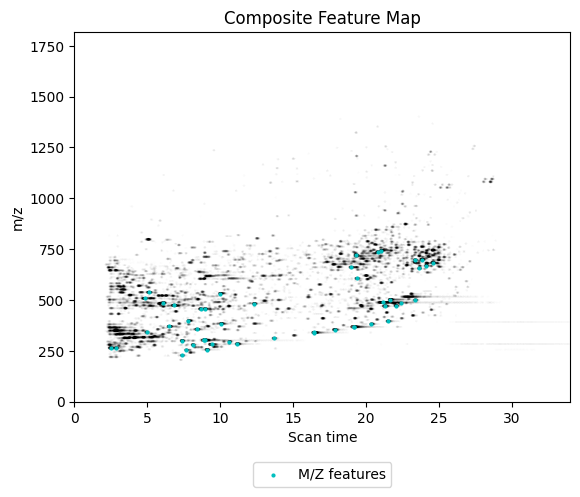

In [9]:
## After calling .find_mass_features, the raw data plot can now be recreated with M/Z features highlighted
# much of the unprocessed data has been cut off by ....the parameters? maybe?
myLCMSobj.plot_composite_mz_features(ms2_plot = False)

In [10]:
## Calls exist to easily retrieve MZ feature specific data
# Call the first MZ feature (index 0)
# List of available properties found in corems/corems/chroma_peak/factory/chroma_peak_classes.py, LCMSMassFeature class
# 'Scan time' is used interchangably with 'Retention time'
myLCMSobj.mass_features[0].retention_time

8.895636666666666

In [11]:
myLCMSobj.mass_features[0].mz

301.21661376953125

In [12]:
myLCMSobj.mass_features[0].intensity

66775328.0

## Add the associated MS1 values

In [13]:
## Instantiated Mass Spectrum objects and store on myLCMSobj
myLCMSobj.add_associated_ms1(auto_process = True, use_parser = False, spectrum_mode = 'profile')

50 mass features remaining


In [14]:
# This call does not add any new information to the .mass_features_to_df() result
# Instead, examine the properties of the identifed MS1 which can be called by their identification keys
print(myLCMSobj.ms.keys())

dict_keys([271, 370, 883, 910, 955, 1198, 1297, 1378, 1513, 1585, 1621, 1693, 1756, 1819, 1882, 1891, 1900, 1927, 2008, 2152, 2170, 2305, 2422, 2674, 2953, 3484, 3781, 4024, 4069, 4105, 4123, 4375, 4483, 4546, 4564, 4600, 4654, 4690, 4780, 4861, 5095, 5167, 5212, 5284, 5392])


In [15]:
# Mass Spectrum objects inhereit properties from MassSpecBase class, corems/corems/mass_spectrum/factory/MassSpectrumClasses.py
# Examine sample spectrum
key = list(myLCMSobj.ms.keys())[0]

## Sample attributes that are now stored on the myLCMS object
print('Abundances as array:')
print(myLCMSobj.ms[key].abundance)
print()
print('M/Z values as array:')
print(myLCMSobj.ms[key].mz_exp)
print()
print('Total ion current of mass spectrum:')
print(myLCMSobj.ms[key].tic)

Abundances as array:
[19102.68164062 16486.91992188 12420.82617188 ... 47565.3515625
 17303.453125   23495.61914062]

M/Z values as array:
[ 201.12873571  207.06647899  207.13928165 ... 1860.54140956 1924.33663261
 1958.86048751]

Total ion current of mass spectrum:
13535584.304467887


<Axes: xlabel='$\t{m/z}$', ylabel='Abundance'>

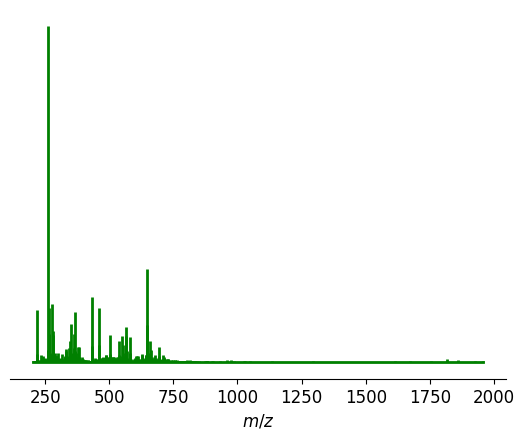

In [16]:
## Visualize the identified spectrum
myLCMSobj._ms[key].plot_centroid()

## Integrate M/Z Features

In [17]:
## Integrate mass features and extract EICs
# fills in the start_scan, final_scan, and area values for the M/Z features
# drop_if_fail argument discards M/Z features that fail to find a left and right limit on a peak
# see corems/corems/mass_spectra/calc/lc_calc.py
myLCMSobj.integrate_mass_features(drop_if_fail = True)

# export data with mass_features_to_df() to see updated table of M/Z features
myLCMSobj.mass_features_to_df()

,scan_time,mz,apex_scan,start_scan,final_scan,intensity,persistence,area,dispersity_index,monoisotopic_mf_id,isotopologue_type,mass_spectrum_deconvoluted_parent
mf_id,,,,,,,,,,,,
0,8.895637,301.216844,1882.0,1828,2008,66775328.0,63432449.0,3.504558e+07,None,None,None,None
1,19.152648,367.357482,4069.0,4024,4312,48137056.0,44794177.0,3.064127e+07,None,None,None,None
3,16.438137,339.326190,3484.0,3448,3673,35888348.0,32545469.0,2.245067e+07,None,None,None,None
4,8.378137,355.321396,1756.0,1729,1936,25525068.0,22182189.0,1.122322e+07,None,None,None,None
5,6.515803,369.300726,1297.0,1261,1378,25392018.0,22049139.0,1.176696e+07,None,None,None,None
6,9.397805,281.248274,2008.0,1954,2053,24492228.0,21149349.0,1.207856e+07,None,None,None,None
7,11.155970,283.263763,2422.0,2386,2683,23294938.0,19952059.0,1.250162e+07,None,None,None,None
8,21.274803,469.404560,4600.0,4564,4735,22771026.0,19428147.0,1.186232e+07,None,None,None,None
10,9.071805,255.232861,1927.0,1891,2008,20920262.0,17577383.0,7.909295e+06,None,None,None,None


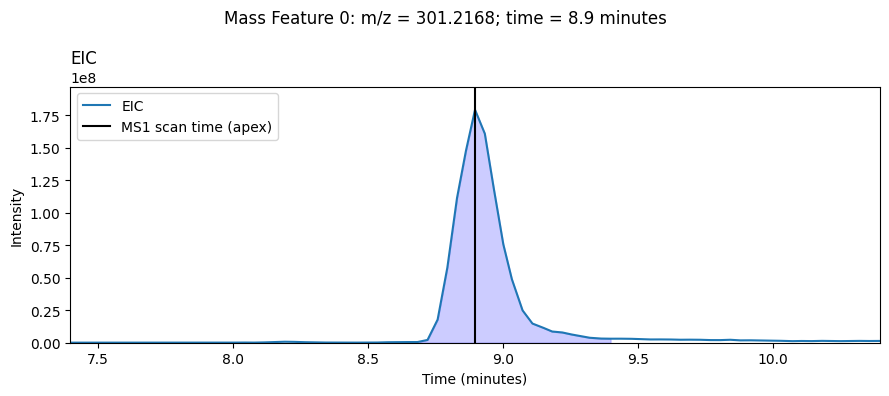

In [18]:
# Generate visualizations of M/Z features
# see more options at corems/chroma_peak/factory/chroma_peak_classes.py
myLCMSobj.mass_features[0].plot(to_plot = ['EIC'])

## Deconvolute MS1 M/Z features

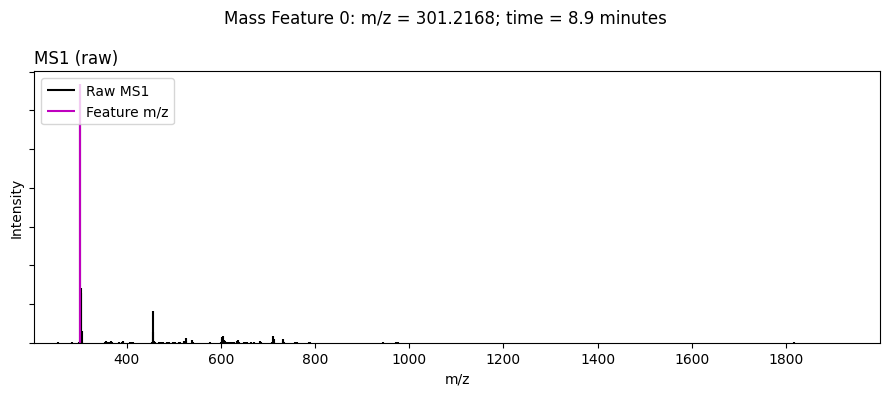

In [19]:
# Visualize raw MS1 M/Z feature
myLCMSobj.mass_features[0].plot(to_plot = ['MS1'])

In [20]:
## Deconvolute the MS1 M/Z features
# Identifies each M/Z feature with boolean indicating if mass_spectrum_deconvoluted_parent exists
# see corems/corems/mass_spectra/calc/lc_calc.py
myLCMSobj.deconvolute_ms1_mass_features()

# export data with mass_features_to_df() to see updated table of M/Z features
myLCMSobj.mass_features_to_df()

,scan_time,mz,apex_scan,start_scan,final_scan,intensity,persistence,area,dispersity_index,monoisotopic_mf_id,isotopologue_type,mass_spectrum_deconvoluted_parent,associated_mass_features
mf_id,,,,,,,,,,,,,
0,8.895637,301.216844,1882.0,1828,2008,66775328.0,63432449.0,3.504558e+07,None,None,None,True,"0, 22, 35"
1,19.152648,367.357482,4069.0,4024,4312,48137056.0,44794177.0,3.064127e+07,None,None,None,True,"1, 48"
3,16.438137,339.326190,3484.0,3448,3673,35888348.0,32545469.0,2.245067e+07,None,None,None,True,"3, 67"
4,8.378137,355.321396,1756.0,1729,1936,25525068.0,22182189.0,1.122322e+07,None,None,None,True,4
5,6.515803,369.300726,1297.0,1261,1378,25392018.0,22049139.0,1.176696e+07,None,None,None,True,5
6,9.397805,281.248274,2008.0,1954,2053,24492228.0,21149349.0,1.207856e+07,None,None,None,True,6
7,11.155970,283.263763,2422.0,2386,2683,23294938.0,19952059.0,1.250162e+07,None,None,None,True,7
8,21.274803,469.404560,4600.0,4564,4735,22771026.0,19428147.0,1.186232e+07,None,None,None,True,8
10,9.071805,255.232861,1927.0,1891,2008,20920262.0,17577383.0,7.909295e+06,None,None,None,True,10


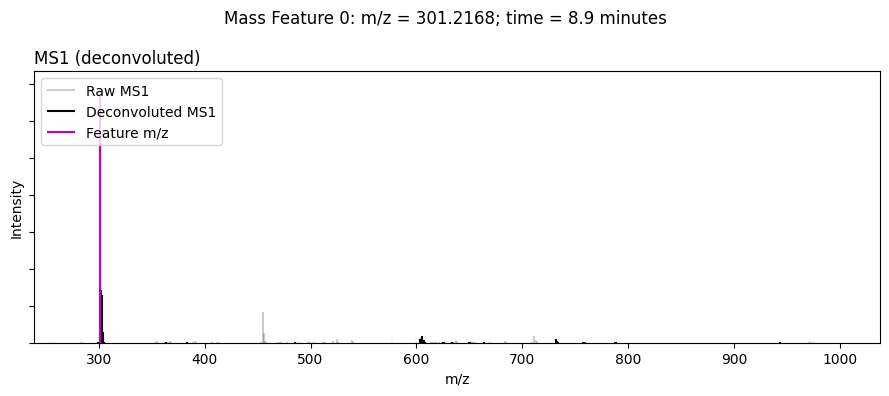

In [21]:
# Visualize deconvoluted MS1 M/Z feature
myLCMSobj.mass_features[0].plot(to_plot = ['MS1'])

## Add more peak metrics, mark likely C13 isotopes connected to M/Z features

In [22]:
## Add more peak metrics, see corems/corems/mass_spectra/calc/lc_calc.py
# fills in dispersity_index and adds columns half_height_width and tailing_factor when possible
myLCMSobj.add_peak_metrics()

# export data with mass_features_to_df() to see updated table of M/Z features
myLCMSobj.mass_features_to_df()

,scan_time,mz,apex_scan,start_scan,final_scan,intensity,persistence,area,half_height_width,tailing_factor,dispersity_index,monoisotopic_mf_id,isotopologue_type,mass_spectrum_deconvoluted_parent,associated_mass_features
mf_id,,,,,,,,,,,,,,,
0,8.895637,301.216844,1882.0,1828,2008,66775328.0,63432449.0,3.504558e+07,0.171916,1.468982,0.028584,None,None,True,"0, 22, 35"
1,19.152648,367.357482,4069.0,4024,4312,48137056.0,44794177.0,3.064127e+07,0.184506,1.739617,0.029239,None,None,True,"1, 48"
3,16.438137,339.326190,3484.0,3448,3673,35888348.0,32545469.0,2.245067e+07,0.185752,1.722910,0.026417,None,None,True,"3, 67"
4,8.378137,355.321396,1756.0,1729,1936,25525068.0,22182189.0,1.122322e+07,0.154333,1.664411,0.021417,None,None,True,4
5,6.515803,369.300726,1297.0,1261,1378,25392018.0,22049139.0,1.176696e+07,0.147667,1.299748,0.018750,None,None,True,5
6,9.397805,281.248274,2008.0,1954,2053,24492228.0,21149349.0,1.207856e+07,0.151494,NaN,0.017418,None,None,True,6
7,11.155970,283.263763,2422.0,2386,2683,23294938.0,19952059.0,1.250162e+07,0.160665,1.779602,0.021251,None,None,True,7
8,21.274803,469.404560,4600.0,4564,4735,22771026.0,19428147.0,1.186232e+07,0.181000,1.534575,0.017083,None,None,True,8
10,9.071805,255.232861,1927.0,1891,2008,20920262.0,17577383.0,7.909295e+06,0.149335,1.618215,0.018249,None,None,True,10


In [23]:
## Mark likely C13 isotopes and connect to M/Z features
# see corems/corems/mass_spectra/calc/lc_calc.py
myLCMSobj.find_c13_mass_features()

# export data with mass_features_to_df() to see updated table of M/Z features
myLCMSobj.mass_features_to_df()

evaluating mass features for C13 isotopes
0.12 of mass features have or are C13 isotopes


,scan_time,mz,apex_scan,start_scan,final_scan,intensity,persistence,area,half_height_width,tailing_factor,dispersity_index,monoisotopic_mf_id,isotopologue_type,mass_spectrum_deconvoluted_parent,associated_mass_features
mf_id,,,,,,,,,,,,,,,
0,8.895637,301.216844,1882.0,1828,2008,66775328.0,63432449.0,3.504558e+07,0.171916,1.468982,0.028584,0,None,True,"0, 22, 35"
1,19.152648,367.357482,4069.0,4024,4312,48137056.0,44794177.0,3.064127e+07,0.184506,1.739617,0.029239,1,None,True,"1, 48"
3,16.438137,339.326190,3484.0,3448,3673,35888348.0,32545469.0,2.245067e+07,0.185752,1.722910,0.026417,3,None,True,"3, 67"
4,8.378137,355.321396,1756.0,1729,1936,25525068.0,22182189.0,1.122322e+07,0.154333,1.664411,0.021417,None,None,True,4
5,6.515803,369.300726,1297.0,1261,1378,25392018.0,22049139.0,1.176696e+07,0.147667,1.299748,0.018750,None,None,True,5
6,9.397805,281.248274,2008.0,1954,2053,24492228.0,21149349.0,1.207856e+07,0.151494,NaN,0.017418,None,None,True,6
7,11.155970,283.263763,2422.0,2386,2683,23294938.0,19952059.0,1.250162e+07,0.160665,1.779602,0.021251,None,None,True,7
8,21.274803,469.404560,4600.0,4564,4735,22771026.0,19428147.0,1.186232e+07,0.181000,1.534575,0.017083,None,None,True,8
10,9.071805,255.232861,1927.0,1891,2008,20920262.0,17577383.0,7.909295e+06,0.149335,1.618215,0.018249,None,None,True,10


## M/Z molecular formula search

In [24]:
## Perform a molecular search on all of the M/Z features' ms1 peaks
# see corems/corems/molecular_id/search/molecularFormulaSearch.py
# SearchMolecularFormulasLC() is a class and run_mass_feature_search() peforms the search
mol_form_search = SearchMolecularFormulasLC(myLCMSobj)
mol_form_search.run_mass_feature_search()

'runworker'  25.03 ms


Loading molecular formula database: 85554it [00:05, 16094.94it/s]
Started molecular formula search for class {"N": 3, "S": 1, "P": 1, "O": 6}, (
Loading molecular formula database: 20706it [00:01, 17984.62it/s]
Started molecular formula search for class {"N": 3, "S": 1, "P": 1, "O": 23}, 


In [25]:
# Examine one peak in one M/Z feature
myLCMSobj.mass_features[0].ms1_peak[0].string

'C20 H30 O2'

In [26]:
# Summarize the MS1 annotations for the M/Z features as a dataframe
# see corems/corems/mass_spectra/factory/lc_class.py
myLCMSobj.mass_features_ms1_annot_to_df()

,m/z,Calibrated m/z,Calculated m/z,Peak Height,Peak Area,Resolving Power,S/N,Ion Charge,m/z Error (ppm),m/z Error Score,...,O,13C,18O,17O,N,P,15N,S,33S,34S
mf_id,,,,,,,,,,,,,,,,,,,,,
0,301.216844,301.216844,301.217304,66775328.0,207870.960423,77398.095874,43.548118,-1,-1.527720,3.473653e-01,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,367.357482,367.357482,367.358154,48137056.0,257301.948288,70824.280454,36.591263,-1,-1.830273,3.495195e-01,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,339.326190,339.326190,339.326854,35888348.0,166884.343737,73369.506973,39.352196,-1,-1.957770,4.369662e-01,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,355.321396,355.321396,355.321769,25525068.0,119802.079339,71415.246462,55.400228,-1,-1.049444,3.225838e-01,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,369.300726,369.300726,369.301033,25392018.0,123970.862580,70282.834803,54.951292,-1,-0.832162,3.511299e-01,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,483.420324,483.420324,483.424126,6827325.0,56187.278356,60632.339803,48.008490,-1,-7.863900,2.254002e-01,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
77,483.420324,483.420324,483.416732,6827325.0,56187.278356,60632.339803,48.008490,-1,7.431386,4.179315e-04,...,4.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN
80,499.415115,499.415115,499.410798,6736558.5,53006.566752,59990.770759,23.164262,-1,8.644095,9.814147e-07,...,1.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN


In [27]:
# Examine the MS1 annotations for just one M/Z feature
myLCMSobj.mass_features[0].mass_spectrum.to_dataframe()

,Index,m/z,Calibrated m/z,Calculated m/z,Peak Height,Peak Area,Resolving Power,S/N,Ion Charge,m/z Error (ppm),...,Heteroatom Class,Ion Type,Adduct,Is Isotopologue,Mono Isotopic Index,Molecular Formula,C,H,O,13C
0,4,301.216844,301.216844,301.217304,6.677533e+07,207870.960423,77398.095874,43.548118,-1,-1.527720,...,O2,de-protonated,NaN,0.0,NaN,C20 H30 O2,20.0,30.0,2.0,NaN
1,6,302.220226,302.220226,302.220659,1.424971e+07,57966.262528,76017.305600,9.431001,-1,-1.432391,...,13C1 O2,de-protonated,NaN,1.0,4.0,C19 H30 O2 13C1,19.0,30.0,2.0,1.0
2,7,303.224701,303.224701,303.224013,1.177640e+06,7164.784534,79525.785861,0.761942,-1,2.269011,...,13C2 O2,de-protonated,NaN,1.0,4.0,C18 H30 O2 13C2,18.0,30.0,2.0,2.0
3,0,255.232873,255.232873,NaN,2.853830e+05,2968.766668,85285.125031,0.187330,-1,NaN,...,unassigned,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,283.264145,283.264145,NaN,1.872186e+05,912.909305,82699.729803,0.121356,-1,NaN,...,unassigned,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,101,943.612183,943.612183,NaN,9.089924e+04,6367.798710,43261.615972,0.060277,-1,NaN,...,unassigned,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102,102,971.174237,971.174237,NaN,1.644620e+05,4594.795336,43498.964610,0.106697,-1,NaN,...,unassigned,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103,103,973.171472,973.171472,NaN,1.506594e+05,12551.528590,43027.769262,0.099644,-1,NaN,...,unassigned,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104,104,975.167958,975.167958,NaN,1.007498e+05,14326.864161,44686.160344,0.065497,-1,NaN,...,unassigned,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## MS2 data

In [28]:
## Add MS2 spectra associated with mass features to the data set
# populates the ms2_scan_numbers attribute in the mass_features dictionary
# see corems/corems/mass_spectra/factory/lc_class.py

# Add HCD MS2 data using the ms2 mass spectrum parameters
myLCMSobj.add_associated_ms2_dda(spectrum_mode = 'centroid', scan_filter = 'hcd')

# Add CID MS2 data using the ms2_cid mass spectrum parameters
myLCMSobj.add_associated_ms2_dda(spectrum_mode = 'centroid', ms_params_key= 'ms2_cid', scan_filter = 'cid')

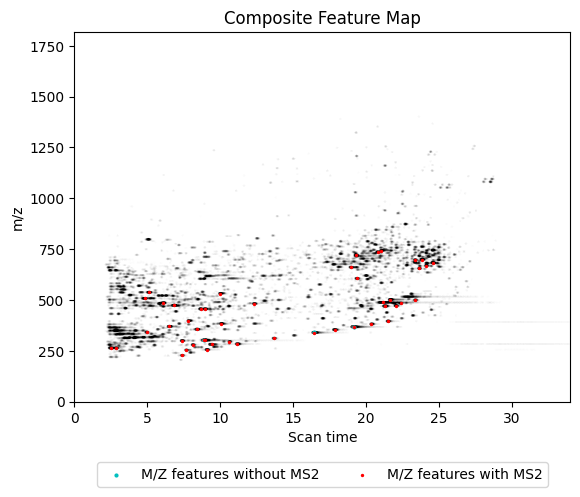

In [29]:
## The M/Z feature plot can now be generated with MS2 peaks identified
myLCMSobj.plot_composite_mz_features()

In [30]:
# MS2 spectra are now added to the main data frame
myLCMSobj.mass_features_to_df()

,scan_time,mz,apex_scan,start_scan,final_scan,intensity,persistence,area,half_height_width,tailing_factor,dispersity_index,monoisotopic_mf_id,isotopologue_type,mass_spectrum_deconvoluted_parent,associated_mass_features,ms2_spectrum
mf_id,,,,,,,,,,,,,,,,
0,8.895637,301.216844,1882.0,1828,2008,66775328.0,63432449.0,3.504558e+07,0.171916,1.468982,0.028584,0,None,True,"0, 22, 35",301.2174:1.0
1,19.152648,367.357482,4069.0,4024,4312,48137056.0,44794177.0,3.064127e+07,0.184506,1.739617,0.029239,1,None,True,"1, 48",367.3582:1.0
3,16.438137,339.326190,3484.0,3448,3673,35888348.0,32545469.0,2.245067e+07,0.185752,1.722910,0.026417,3,None,True,"3, 67",339.327:1.0
4,8.378137,355.321396,1756.0,1729,1936,25525068.0,22182189.0,1.122322e+07,0.154333,1.664411,0.021417,None,None,True,4,355.3217:1.0
5,6.515803,369.300726,1297.0,1261,1378,25392018.0,22049139.0,1.176696e+07,0.147667,1.299748,0.018750,None,None,True,5,369.3012:1.0
6,9.397805,281.248274,2008.0,1954,2053,24492228.0,21149349.0,1.207856e+07,0.151494,NaN,0.017418,None,None,True,6,281.2486:1.0
7,11.155970,283.263763,2422.0,2386,2683,23294938.0,19952059.0,1.250162e+07,0.160665,1.779602,0.021251,None,None,True,7,283.2642:1.0
8,21.274803,469.404560,4600.0,4564,4735,22771026.0,19428147.0,1.186232e+07,0.181000,1.534575,0.017083,None,None,True,8,469.4053:1.0; 470.4081:0.03
10,9.071805,255.232861,1927.0,1891,2008,20920262.0,17577383.0,7.909295e+06,0.149335,1.618215,0.018249,None,None,True,10,255.2332:1.0


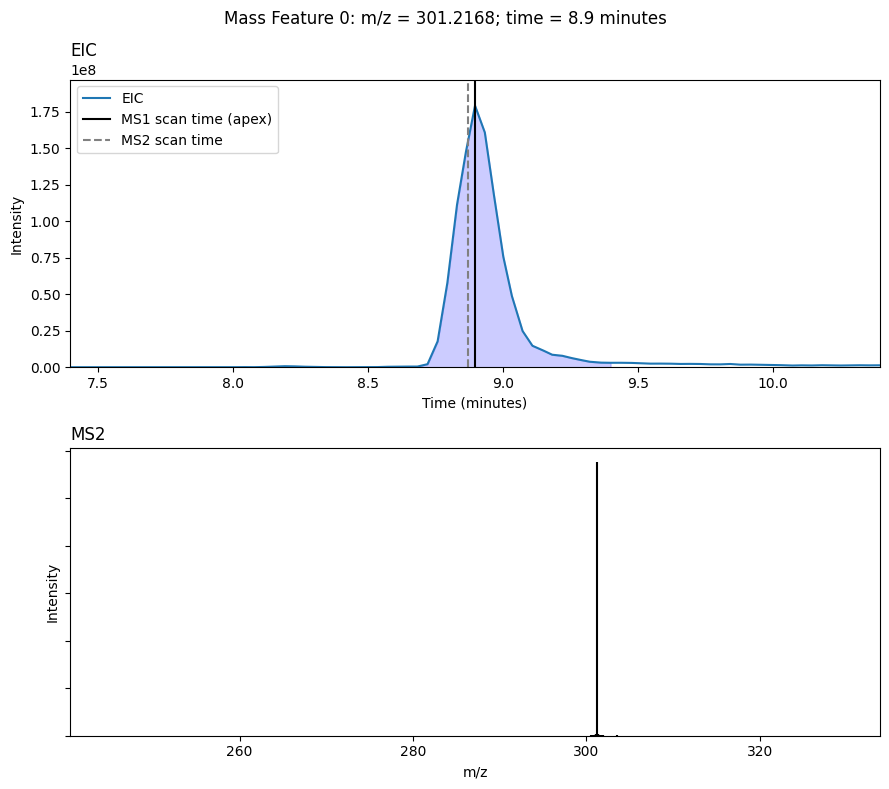

In [31]:
# Plot the MS2 spectrum associated with an M/Z feature
myLCMSobj.mass_features[0].plot(to_plot = ['EIC', 'MS2'])

## Export data

In [32]:
# Export the LCMS object using the LCMSExport class
# see corems/corems/mass_spectra/output/export.py
# contains more functions to clean and summarize data
exporter = LCMSExport(
    'Blanch_Nat_Lip_C_12_AB_M_17_NEG_25Jan18_Brandi-WCSH5801', 
    myLCMSobj
)

# Save report as HDF5 file
exporter.to_hdf(overwrite = True)

## Clean up files

In [33]:
# Delete the "Blanch_Nat_Lip_C_12_AB_M_17_NEG_25Jan18_Brandi-WCSH5801.corems" directory
shutil.rmtree(
    'Blanch_Nat_Lip_C_12_AB_M_17_NEG_25Jan18_Brandi-WCSH5801.corems',
    ignore_errors = True,
)